In [20]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Ensure the Agg backend is used for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend if only the plt module is imported

import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance

# Enable inline plotting (Kaggle specific)
%matplotlib inline

# Set aesthetic parameters for seaborn
sns.set(style='whitegrid', palette='muted', color_codes=True)

print('Imports and settings completed.')

Imports and settings completed.


In [21]:
# Load the dataset
data_path = ("C:/Users/HP/Downloads/filtered_thyroid_data.csv")
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

# Quick check of the data
print('Data loaded successfully.')
print('Shape of the dataset:', df.shape)
df.head()

Data loaded successfully.
Shape of the dataset: (383, 13)


,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [22]:
# Display dataset information
df.info()

# Statistical summary of numeric columns
df.describe()

# Display missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB
Missing values in each column:
Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk       

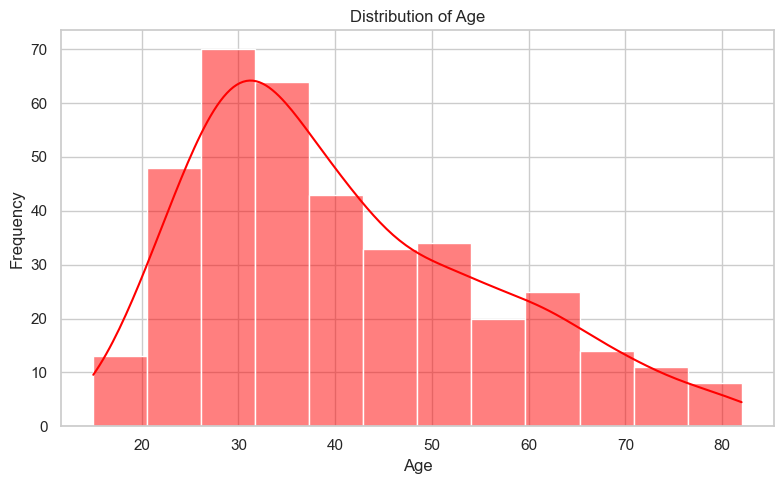

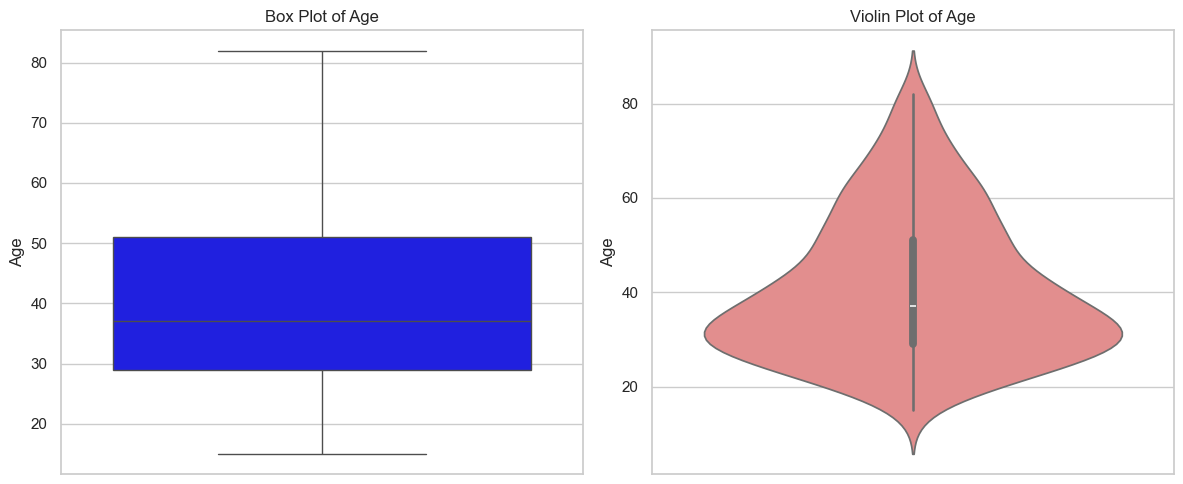

C:\Users\HP\AppData\Local\Temp\ipykernel_6936\2397499788.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recurred', data=df, palette='pastel')


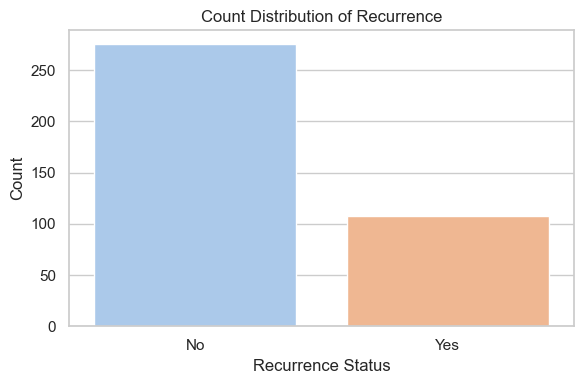

C:\Users\HP\AppData\Local\Temp\ipykernel_6936\2397499788.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='muted')


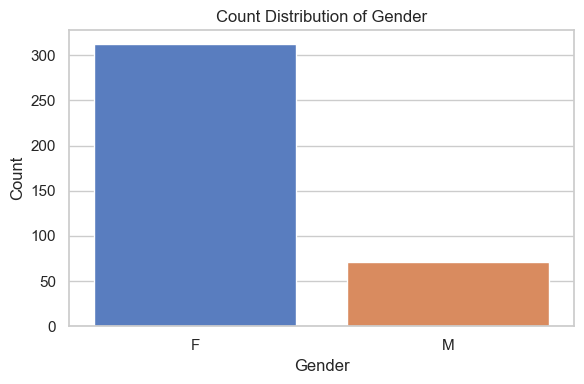

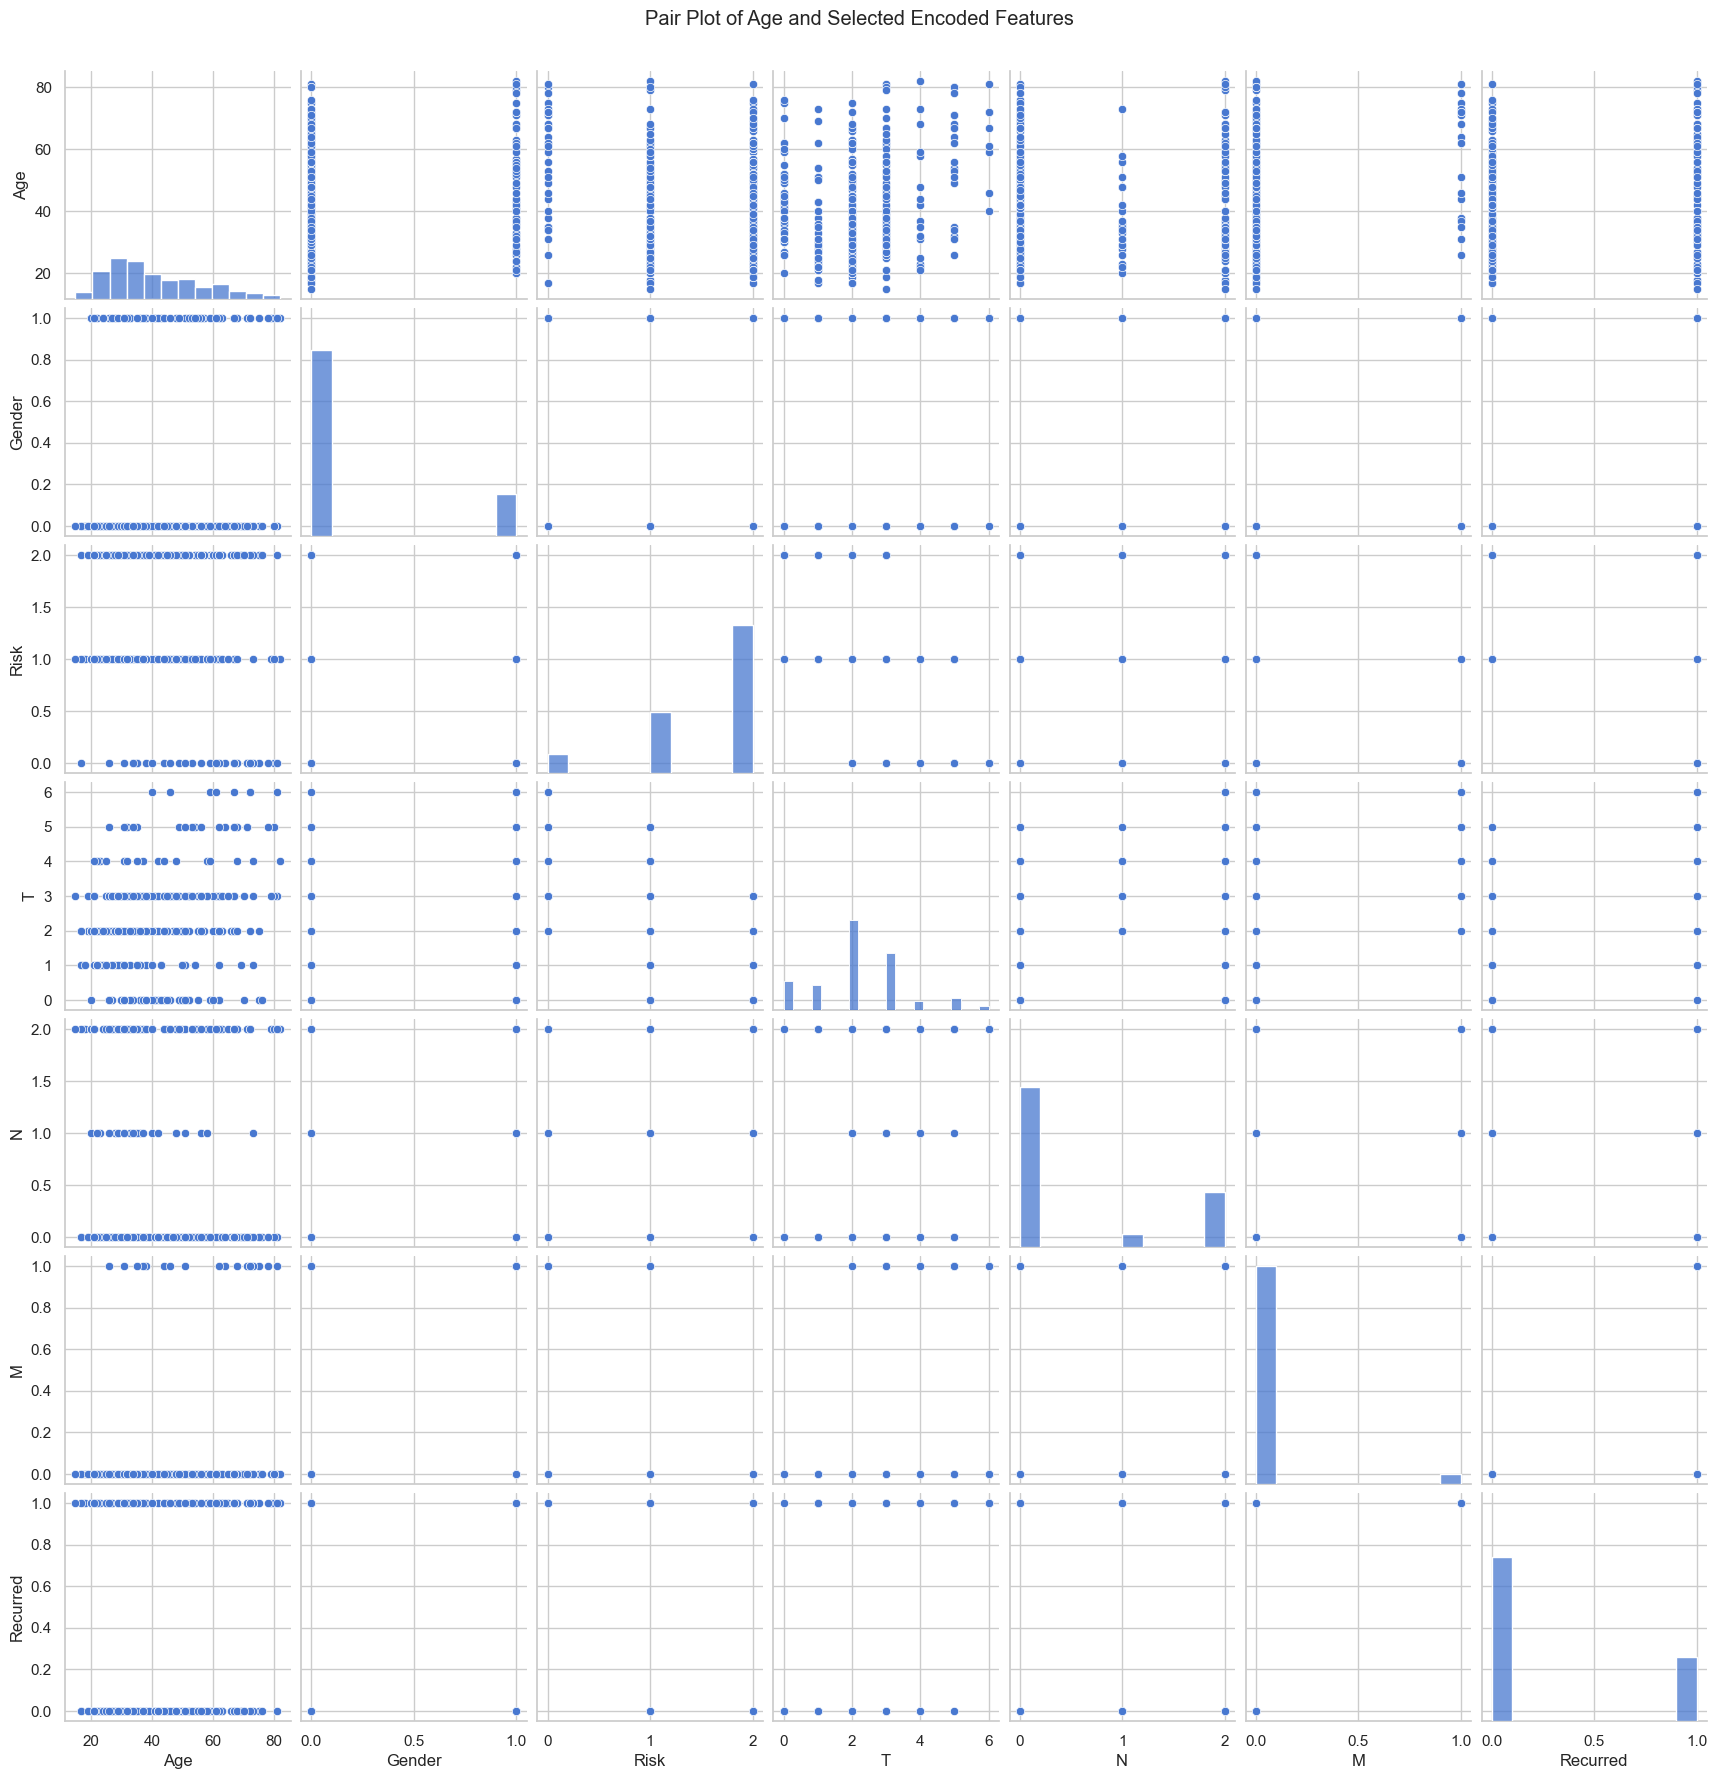

In [23]:
# Histogram of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box and Violin plots for Age to inspect outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'], color='blue')
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.violinplot(y=df['Age'], color='lightcoral')
plt.title('Violin Plot of Age')

plt.tight_layout()
plt.show()

# Pie/Count plot (as count plot) for Recurred column
plt.figure(figsize=(6, 4))
sns.countplot(x='Recurred', data=df, palette='pastel')
plt.title('Count Distribution of Recurrence')
plt.xlabel('Recurrence Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar plot for Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='muted')
plt.title('Count Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Pair plot using Age and encoding a few categorical features
# For this, we create a temporary dataframe with numerical conversion for illustration
temp_df = df.copy()
le = LabelEncoder()
for col in ['Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']:
    temp_df[col] = le.fit_transform(temp_df[col])

sns.pairplot(temp_df[['Age', 'Gender', 'Risk', 'T', 'N', 'M', 'Recurred']])
plt.suptitle('Pair Plot of Age and Selected Encoded Features', y=1.02)
plt.show()

In [24]:
# Check for any missing values
print('Missing values before cleaning:')
print(df.isnull().sum())

# If missing values are present, we could impute or drop 
df_clean = df.dropna()
print('Shape after dropping missing values:', df_clean.shape)

# Encode categorical features
categorical_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'object']
print('Categorical columns:', categorical_cols)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  

print('Data cleaning and encoding completed.')
df_clean.head()

Missing values before cleaning:
Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64
Shape after dropping missing values: (383, 13)
Categorical columns: ['Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
Data cleaning and encoding completed.


,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,3,2,1,2,0,0,0,0,2,0
1,34,0,0,3,2,1,2,0,0,0,0,1,0
2,30,0,0,3,2,1,2,0,0,0,0,1,0
3,62,0,0,3,2,1,2,0,0,0,0,1,0
4,62,0,0,3,2,0,2,0,0,0,0,1,0


Test Accuracy: 0.935064935064935


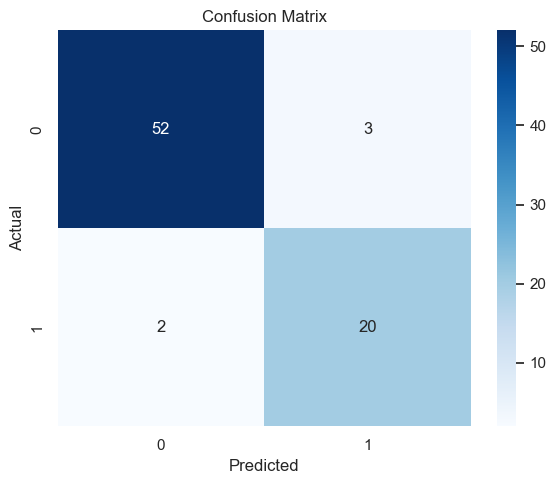

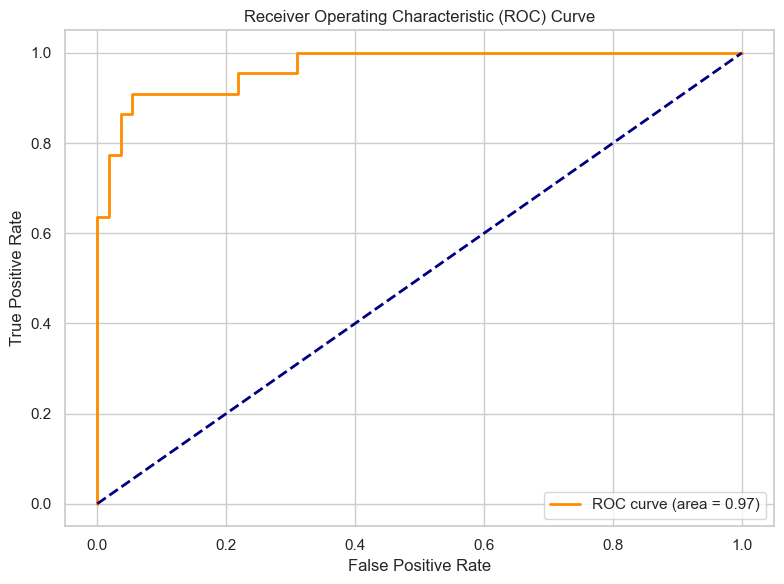

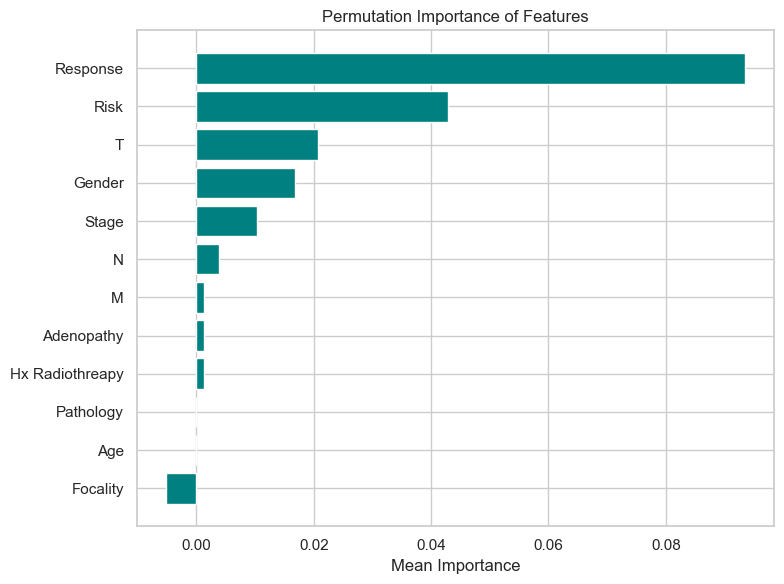

In [25]:
# Define features and target
# We treat 'Recurred' as the target variable
X = df_clean.drop('Recurred', axis=1)
y = df_clean['Recurred']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Compute ROC curve and AUC
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Permutation importance
perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(np.array(X.columns)[sorted_idx], perm_importance.importances_mean[sorted_idx], color='teal')
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()